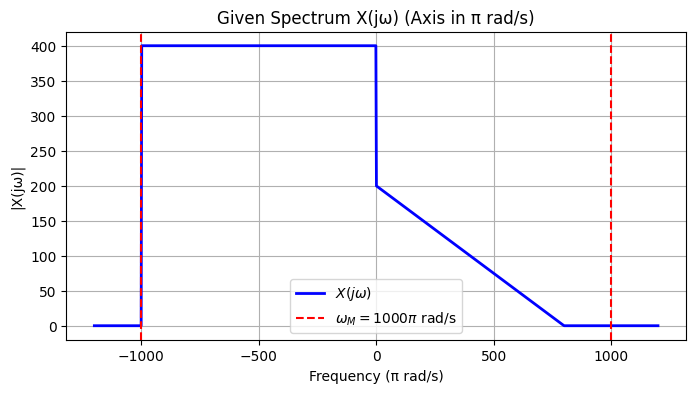

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the frequency range
omega = np.linspace(-1200*np.pi, 1200*np.pi, 1000)

# Define X(jw) based on given description
X = np.zeros_like(omega)

# First segment: Vertical line at -1000π up to 400
X[(omega >= -1000*np.pi) & (omega < 0)] = 400

# Second segment: Diagonal line from (0,200) to (800π, 0)
mask = (omega >= 0) & (omega <= 800*np.pi)
X[mask] = 200 * (1 - omega[mask] / (800*np.pi))

# Plot the spectrum with x-axis in π rad/s
plt.figure(figsize=(8, 4))
plt.plot(omega/np.pi, X, 'b', linewidth=2, label='$X(j\omega)$')

# Highlight Nyquist frequency
plt.axvline(x=1000, color='r', linestyle='--', label='$\omega_M = 1000\pi$ rad/s')
plt.axvline(x=-1000, color='r', linestyle='--')

# Labels and title
plt.xlabel('Frequency (π rad/s)')
plt.ylabel('|X(jω)|')
plt.title('Given Spectrum X(jω) (Axis in π rad/s)')
plt.legend()
plt.grid()
plt.show()


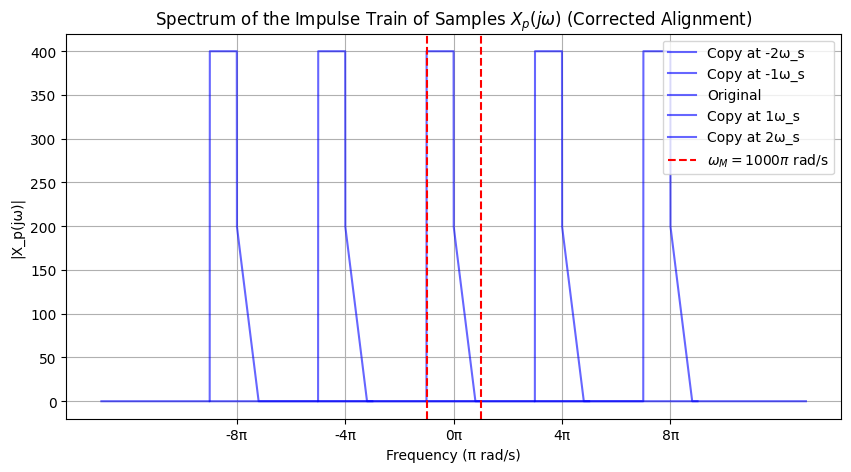

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define frequency range just beyond signal edges
omega = np.linspace(-5000 * np.pi, 5000 * np.pi, 2000)

# Original spectrum X(jw)
X = np.zeros_like(omega)
X[(omega >= -1000*np.pi) & (omega < 0)] = 400  # Vertical step at -1000π
mask = (omega >= 0) & (omega <= 800*np.pi)
X[mask] = 200 * (1 - omega[mask] / (800*np.pi))  # Diagonal segment

# Define sampling frequency
omega_s = 4000 * np.pi

# Re-plot with properly centered copies and correctly aligned x-axis labels in terms of π rad/s
plt.figure(figsize=(10, 5))
omega_limited = np.linspace(-5000 * np.pi, 5000 * np.pi, 2000)  # Adjusted range for better visibility

for k in range(-2, 3):  # Fewer replications to spread it out
    plt.plot((omega + k * omega_s) / np.pi, X, 'b', alpha=0.6, label=f'Copy at {k}ω_s' if k != 0 else 'Original')

# Highlight Nyquist frequency
plt.axvline(x=1000, color='r', linestyle='--', label='$\omega_M = 1000\pi$ rad/s')
plt.axvline(x=-1000, color='r', linestyle='--')

# Define correct tick positions at multiples of ω_s = 4000π
tick_positions = np.arange(-2, 3) * 4000  # Multiples of 4000π
plt.xticks(ticks=tick_positions, labels=[f"{int(t/1000)}π" for t in tick_positions])

# Labels and title
plt.xlabel('Frequency (π rad/s)')
plt.ylabel('|X_p(jω)|')
plt.title('Spectrum of the Impulse Train of Samples $X_p(j\omega)$ (Corrected Alignment)')
plt.legend()
plt.grid()
plt.show()


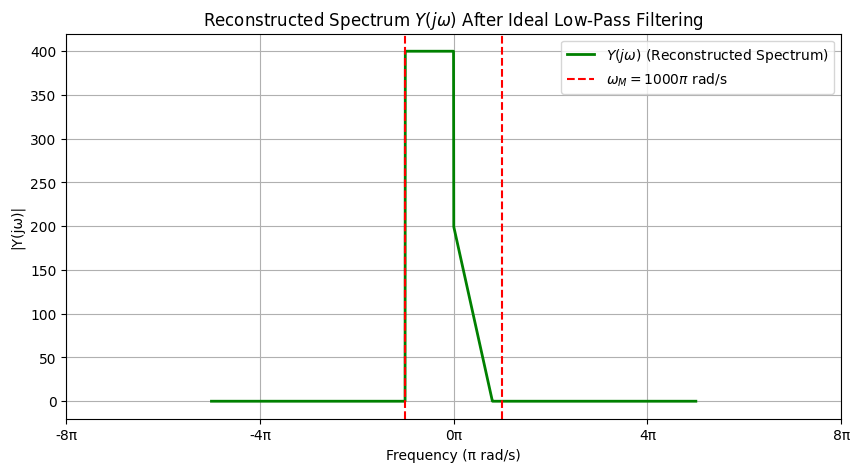

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define frequency range
omega = np.linspace(-5000 * np.pi, 5000 * np.pi, 2000)

# Original spectrum X(jw)
X = np.zeros_like(omega)
X[(omega >= -1000*np.pi) & (omega < 0)] = 400  # Vertical step at -1000π
mask = (omega >= 0) & (omega <= 800*np.pi)
X[mask] = 200 * (1 - omega[mask] / (800*np.pi))  # Diagonal segment

# Define sampling frequency
omega_s = 4000 * np.pi

# Reconstruction: Applying an ideal low-pass filter (LPF)
# The LPF retains only the original spectrum in the range [-ω_M, ω_M]
Y = np.copy(X)
Y[(omega < -1000*np.pi) | (omega > 800*np.pi)] = 0  # Zero out frequencies beyond original range

# Plot the reconstructed spectrum Y(jω)
plt.figure(figsize=(10, 5))
plt.plot(omega / np.pi, Y, 'g', linewidth=2, label='$Y(j\omega)$ (Reconstructed Spectrum)')

# Highlight Nyquist frequency and filtering
plt.axvline(x=1000, color='r', linestyle='--', label='$\omega_M = 1000\pi$ rad/s')
plt.axvline(x=-1000, color='r', linestyle='--')

# Define correct tick positions at multiples of ω_s = 4000π
tick_positions = np.arange(-2, 3) * 4000  # Multiples of 4000π
plt.xticks(ticks=tick_positions, labels=[f"{int(t/1000)}π" for t in tick_positions])

# Labels and title
plt.xlabel('Frequency (π rad/s)')
plt.ylabel('|Y(jω)|')
plt.title('Reconstructed Spectrum $Y(j\omega)$ After Ideal Low-Pass Filtering')
plt.legend()
plt.grid()
plt.show()

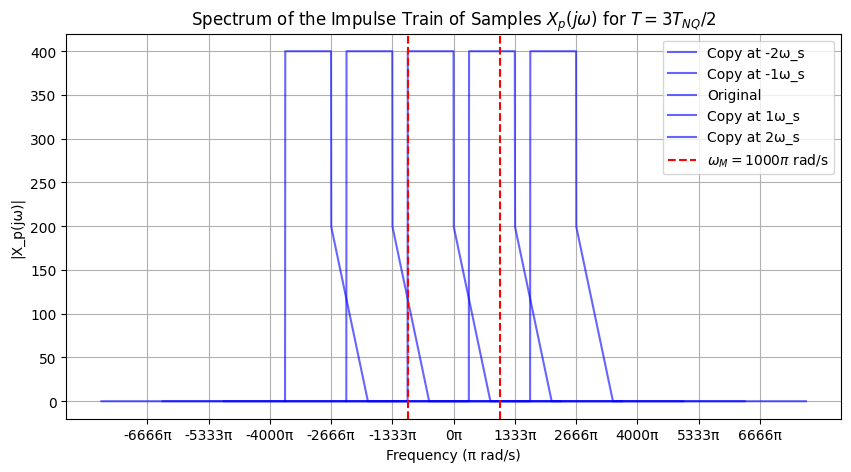

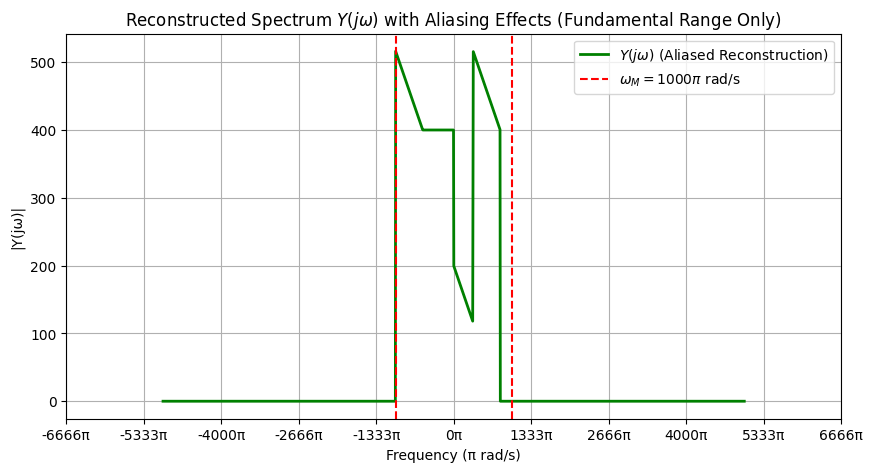

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define frequency range just beyond signal edges
omega = np.linspace(-5000 * np.pi, 5000 * np.pi, 2000)

# Original spectrum X(jw)
X = np.zeros_like(omega)
X[(omega >= -1000*np.pi) & (omega < 0)] = 400  # Vertical step at -1000π
mask = (omega >= 0) & (omega <= 800*np.pi)
X[mask] = 200 * (1 - omega[mask] / (800*np.pi))  # Diagonal segment

# Define new sampling frequency for T = 3T_NQ/2
omega_s_new = (4000 * np.pi) / 3  # New sampling frequency

# Generate X_p(jw) for the new sampling frequency
plt.figure(figsize=(10, 5))
for k in range(-2, 3):  # Fewer replications to spread it out
    plt.plot((omega + k * omega_s_new) / np.pi, X, 'b', alpha=0.6, label=f'Copy at {k}ω_s' if k != 0 else 'Original')

# Highlight Nyquist frequency
plt.axvline(x=1000, color='r', linestyle='--', label='$\omega_M = 1000\pi$ rad/s')
plt.axvline(x=-1000, color='r', linestyle='--')

# Define tick positions at the center of each overlapped spectral copy
num_ticks = 5  # Number of tick marks on each side
center_positions = np.arange(-num_ticks, num_ticks + 1) * omega_s_new / np.pi  # Centers of each spectral copy

# Ensure even spacing and correctness
plt.xticks(ticks=center_positions, labels=[f"{int(t)}π" for t in center_positions])

# Labels and title
plt.xlabel('Frequency (π rad/s)')
plt.ylabel('|X_p(jω)|')
plt.title('Spectrum of the Impulse Train of Samples $X_p(j\omega)$ for $T = 3T_{NQ}/2$')
plt.legend()
plt.grid()
plt.show()

# Compute the aliased reconstructed spectrum Y(jw) - only in fundamental range
Y_aliased = np.zeros_like(omega)

# Sum the overlapping spectral copies to show aliasing distortion (only within fundamental range)
for k in range(-2, 3):  # Include multiple shifts to show aliasing
    Y_aliased += np.interp(omega, omega + k * omega_s_new, X, left=0, right=0)

# Only retain the fundamental range [-ω_M, ω_M]
Y_aliased[(omega < -1000*np.pi) | (omega > 800*np.pi)] = 0

# Plot the aliased reconstructed spectrum
plt.figure(figsize=(10, 5))
plt.plot(omega / np.pi, Y_aliased, 'g', linewidth=2, label='$Y(j\omega)$ (Aliased Reconstruction)')

# Highlight Nyquist frequency and filtering limits
plt.axvline(x=1000, color='r', linestyle='--', label='$\omega_M = 1000\pi$ rad/s')
plt.axvline(x=-1000, color='r', linestyle='--')

# Define correct tick positions at the center of each overlapped spectral copy
plt.xticks(ticks=center_positions, labels=[f"{int(t)}π" for t in center_positions])

# Labels and title
plt.xlabel('Frequency (π rad/s)')
plt.ylabel('|Y(jω)|')
plt.title('Reconstructed Spectrum $Y(j\omega)$ with Aliasing Effects (Fundamental Range Only)')
plt.legend()
plt.grid()
plt.show()

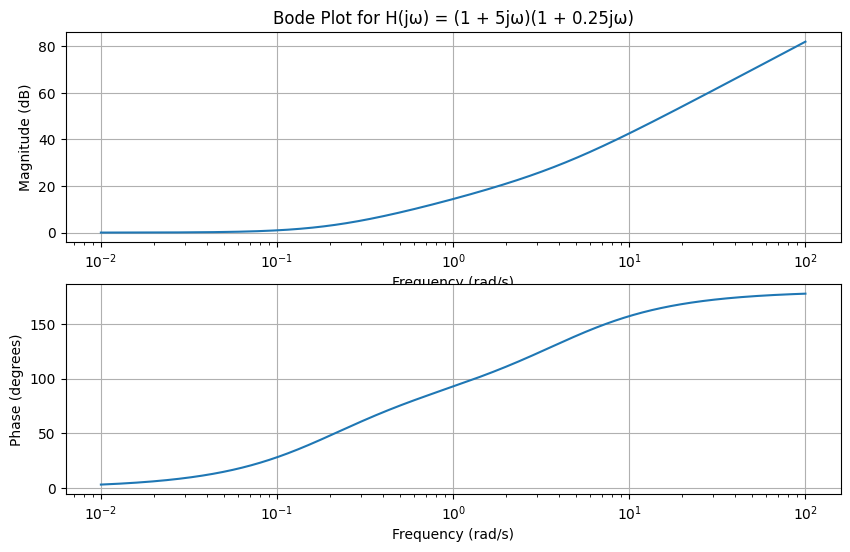

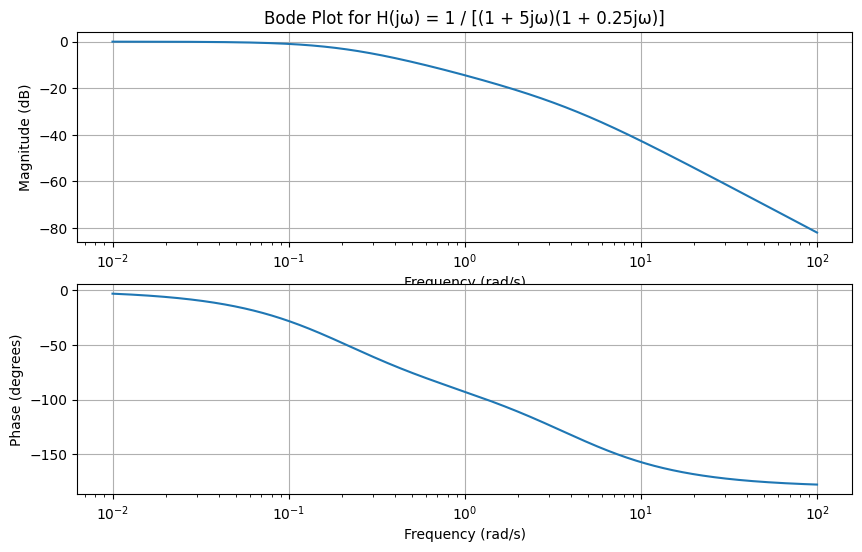

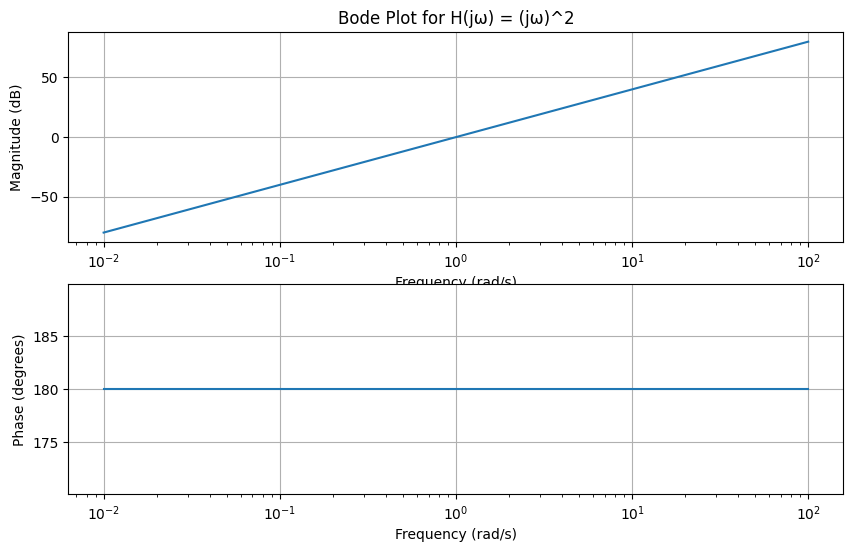

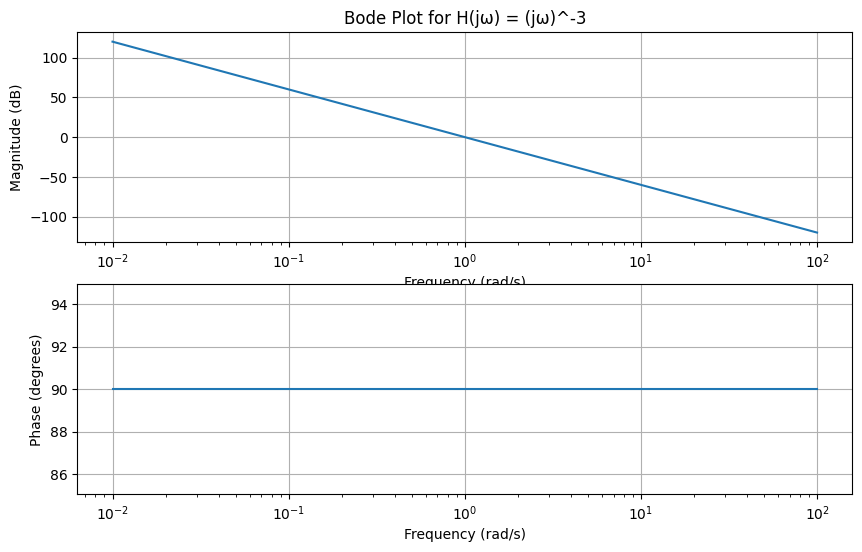

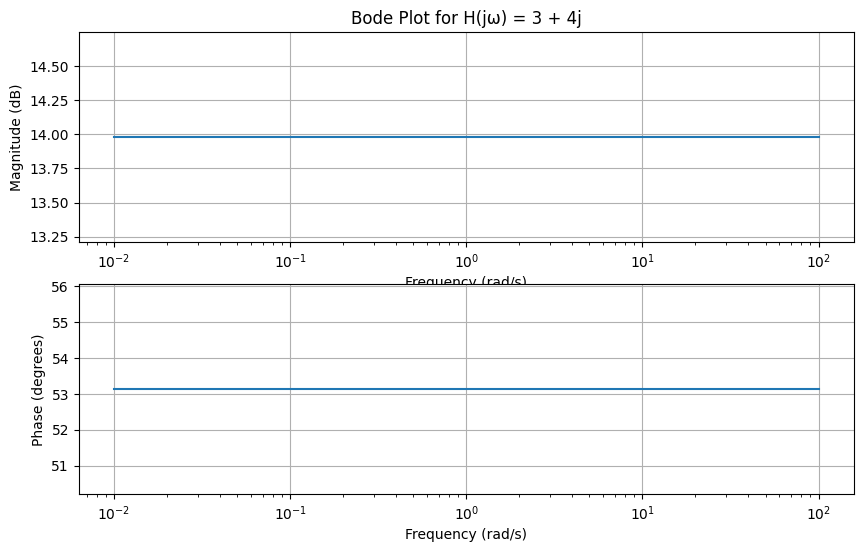

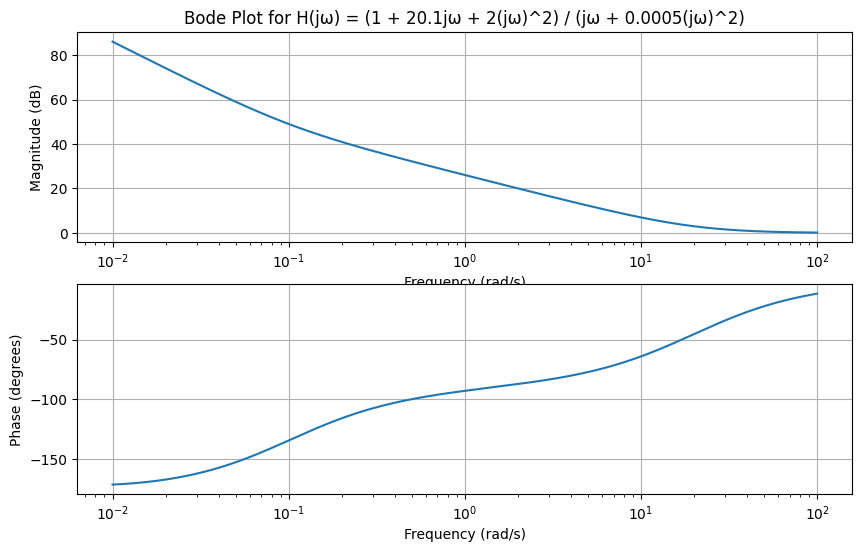

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, bode

# Define frequency range (log scale for Bode plot)
omega = np.logspace(-2, 2, 1000)  # From 10^(-2) to 10^(2) rad/s

# Define the transfer functions
num1 = [5, 1]  # (1 + 5jw)
den1 = [0.25, 1]  # (1 + 0.25jw)
H1 = TransferFunction(np.convolve(num1, den1), [1])  # H(jw) = (1 + 5jw)(1 + 0.25jw)
H2 = TransferFunction([1], np.convolve(num1, den1))  # H(jw) = 1 / [(1 + 5jw)(1 + 0.25jw)]
H3 = TransferFunction([1, 0, 0], [1])  # H(jw) = (jw)^2
H4 = TransferFunction([1], [1, 0, 0, 0])  # H(jw) = (jw)^-3
H5 = TransferFunction([3 + 4j], [1])  # H(jw) = 3 + 4j
H6 = TransferFunction([1, 20.1, 2], [1, 0.0005, 0])  # H(jw) = (1 + 20.1jw + 2(jw)^2) / (jw + 0.0005(jw)^2)

# List of transfer functions and their titles
transfer_functions = [(H1, 'H(jω) = (1 + 5jω)(1 + 0.25jω)'),
                       (H2, 'H(jω) = 1 / [(1 + 5jω)(1 + 0.25jω)]'),
                       (H3, 'H(jω) = (jω)^2'),
                       (H4, 'H(jω) = (jω)^-3'),
                       (H5, 'H(jω) = 3 + 4j'),
                       (H6, 'H(jω) = (1 + 20.1jω + 2(jω)^2) / (jω + 0.0005(jω)^2)')]

# Generate Bode plots
for H, title in transfer_functions:
    omega_vals, mag, phase = bode(H, omega)
    
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.semilogx(omega_vals, mag)
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Magnitude (dB)')
    plt.title(f'Bode Plot for {title}')
    plt.grid()
    
    plt.subplot(2, 1, 2)
    plt.semilogx(omega_vals, phase)
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Phase (degrees)')
    plt.grid()
    plt.show()
